In this notebook, we investigate the effects of precipitation on volcanic eruptions in the Galapagos. We use satellite precipitation data that ranges between June 6, 2000 through April 30, 2023. 12 eruptions occur in this period-- 5 at Fernandina, 2 at Cerro Azul, 3 at Sierra Negra, and 2 at Wolf. 

In [91]:
# Import necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from matplotlib import cm
import matplotlib.patches as mpatches

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))

In [4]:
# Function used to convert date strings into floats
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

We look at 90 day rolling averages of rainfall at each volcano site. We group dates at each volcano into tertiles based on the 90 day rolling rain averages.

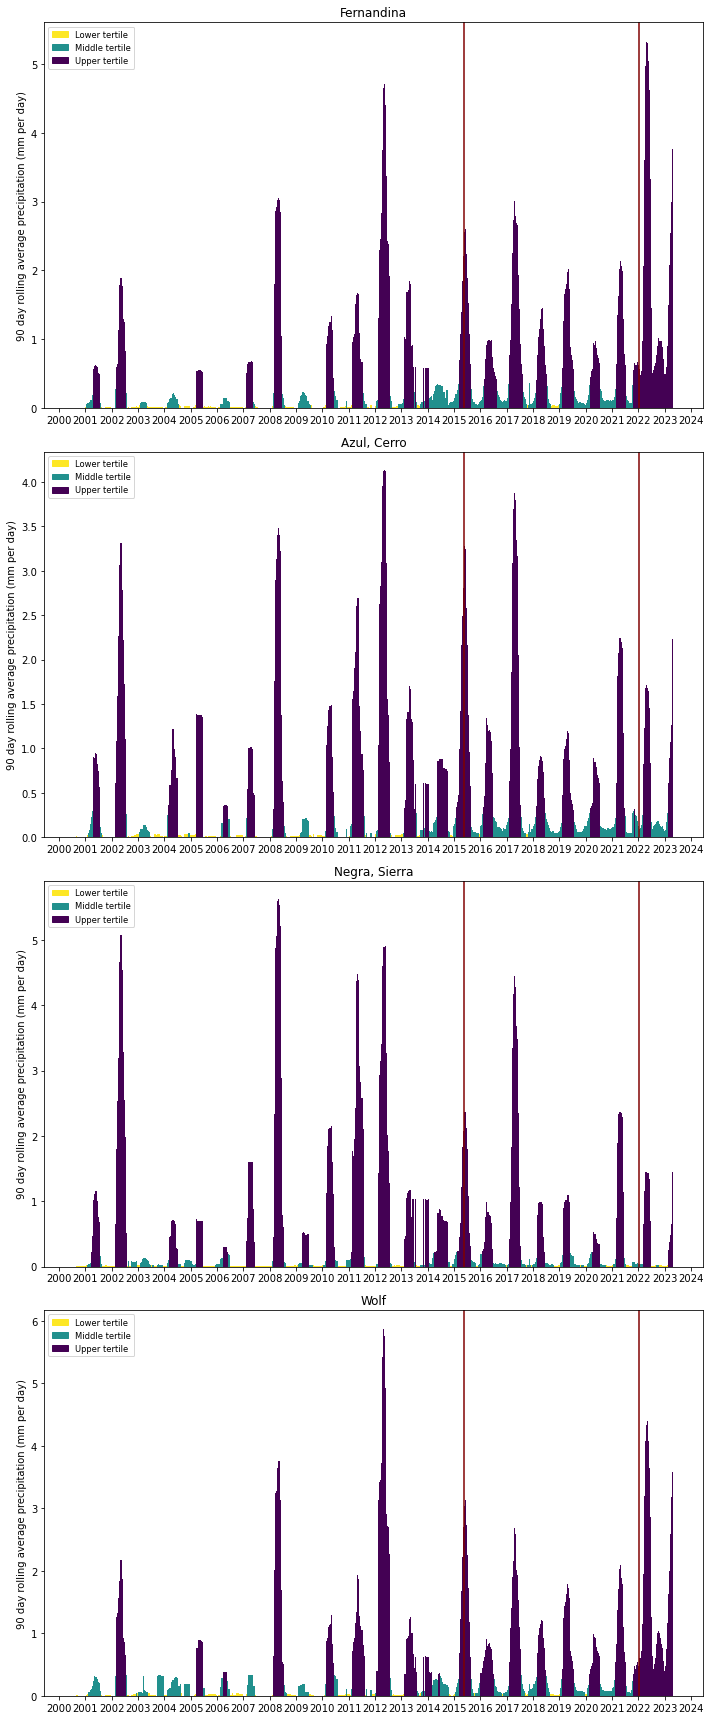

In [97]:
#Plot all volcanos
volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05)}
fig, axes = plt.subplots(4, 1, figsize=(10, 24))
count = 0
color1_rgb = viridis_colormap(255)[:3]  # RGB for the first color
color2_rgb = viridis_colormap(127)[:3]  # RGB for a color in the middle
color3_rgb = viridis_colormap(0)[:3]  # RGB for the last color

for pick in volcanos:

    erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])].copy()
    rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
    rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
    rolling_galapagos = rolling_galapagos.dropna()

    dates = rolling_galapagos.sort_values(by=['roll90'])
    date_dec = np.array(dates['Decimal'])
    date_rain = np.array(dates['roll90'])
    bin_size = len(dates) // 3
    colors = [color1_rgb, color2_rgb, color3_rgb]
    for l in range(3):
        axes[count].bar(date_dec[l*(bin_size): (l+1)*bin_size], date_rain[l*(bin_size): (l+1)*bin_size], color =colors[l], width = 0.01)

    for line_x in eruption_lines:
        axes[count].axvline(x=line_x, color='maroon')


    axes[count].set_ylabel("90 day rolling average precipitation (mm per day)")
 
    axes[count].set_title(str(pick))

    axes[count].set_xticks(ticks=[2000 + i for i in range(25)], rotation=90)

    legend_handles = [
    mpatches.Patch(color=colors[0], label='Lower tertile'),
    mpatches.Patch(color=colors[1], label='Middle tertile'),
    mpatches.Patch(color=colors[2], label='Upper tertile')]
    axes[count].legend(handles=legend_handles, loc='upper left', fontsize='small')
    count += 1
# Data plot
plt.tight_layout()
plt.show()


Grouping together eruptions of each volcano that fall within lower, middle, and upper tertiles, we get the following bar plot.

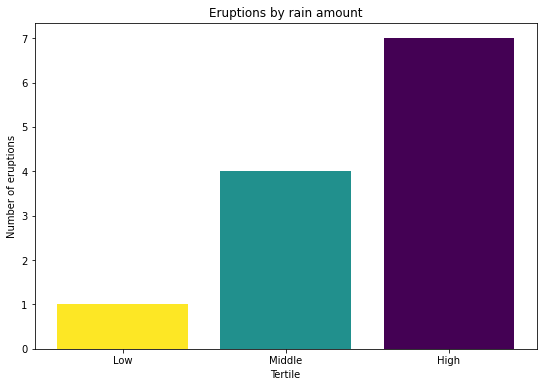

In [87]:
# Volcano longitude and latitudes are recorded in a dictionary. "Picks" is the list of volcanos whose eruptions will be considered.
volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05)}
picks = ['Fernandina', 'Azul, Cerro', 'Negra, Sierra', 'Wolf'] #choose volcano(s)

plt.figure(figsize=(9,6))

categories = ['Low', 'Middle', 'High']
values = [0,0,0]

for i in picks:
    erupt_dates = np.array(eruptions['Start'][(eruptions['Volcano'] == i) & (eruptions['Start'] >= '2000')])
    rolling_rain = rainfall[(rainfall['Longitude'] == volcanos[i][0]) & (rainfall['Latitude'] == volcanos[i][1])].copy()
    rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
    rolling_rain = rolling_rain.dropna()    
    all_rain = list(rolling_rain.sort_values(by=['roll90'])['Date'])
    third = len(all_rain) // 3
    for l in erupt_dates:
        values[all_rain.index(l) // third] += 1  

num_colors = 256
viridis_colormap = cm.get_cmap('viridis', num_colors)

color1_rgb = viridis_colormap(255)[:3]  # RGB for the first color
color2_rgb = viridis_colormap(127)[:3]  # RGB for a color in the middle
color3_rgb = viridis_colormap(0)[:3]  # RGB for the last color
        
plt.bar(categories, values, color=[color1_rgb, color2_rgb, color3_rgb])
plt.xlabel("Tertile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions by rain amount")
plt.show()

7 out of 12 eruptions (58.3%) occur in the top tertile. Further the 2009 eruption of Fernandina, which falls in the middle tertile, occurs during the rainiest period of that year.

Below, we plot rainfall at the volcano sites by year to demonstrate the seasonal nature of rainfall.

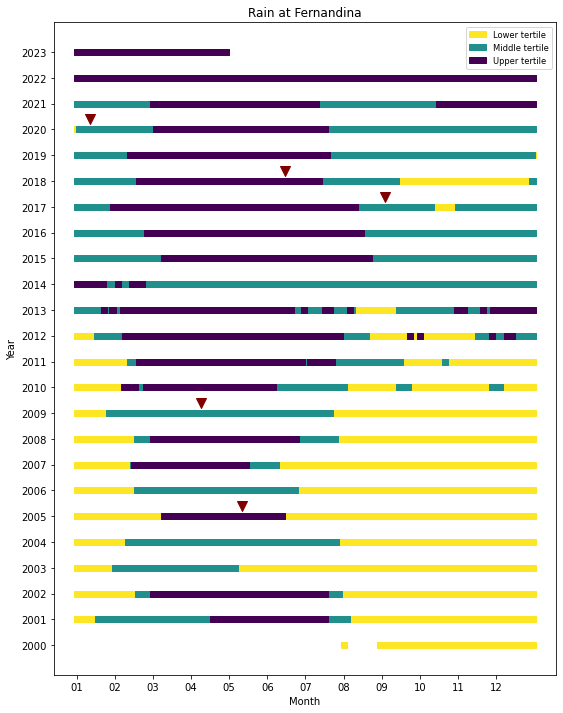

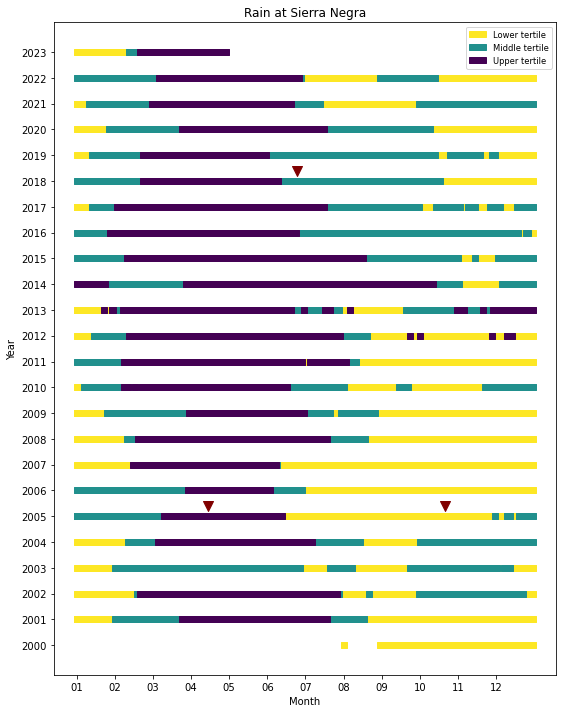

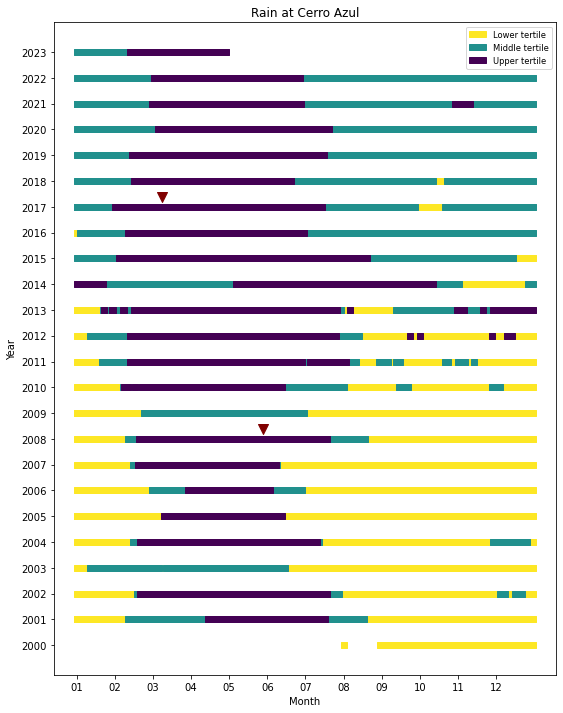

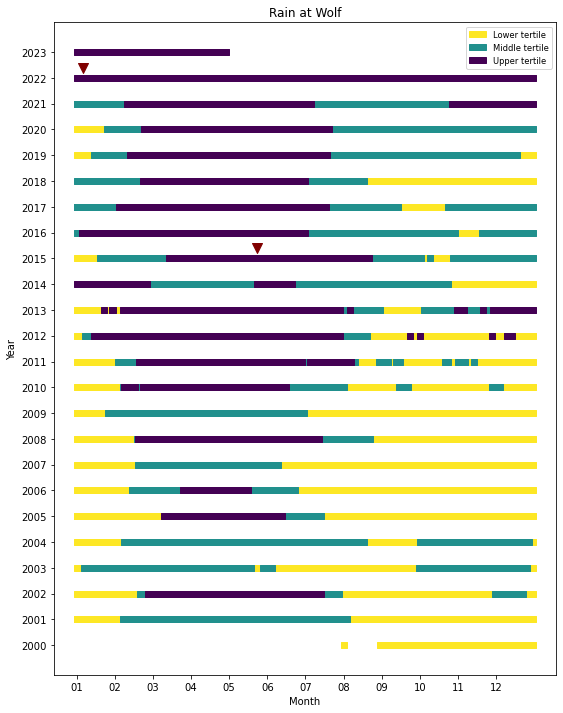

In [98]:
# Generates a plot of eruptions for each volcano listed in "picks", along with color coding of the top three quintiles of rainfall. 
volcanos = {'Fernandina': (-91.55, -.35, 'Fernandina'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Wolf': (-91.35, .05, 'Wolf')}
picks = ['Fernandina', 'Negra, Sierra', 'Azul, Cerro', 'Wolf']

eruptions['Decimal'] = eruptions.Start.apply(date_to_decimal_year)

for pick in picks:
    
    erupt_dates = np.array(eruptions['Decimal'][(eruptions['Volcano'] == pick) & (eruptions['Start'] >= '2000')])
    rolling_galapagos = rainfall[(rainfall['Longitude'] == volcanos[pick][0]) & (rainfall['Latitude'] == volcanos[pick][1])].copy()
    rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
    rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
    rolling_galapagos = rolling_galapagos.dropna()

    plt.figure(figsize=(9,12))

    volc_x = [((i) % 1) for i in erupt_dates]
    volc_y = [(i // 1) + .4 for i in erupt_dates]
    labels = list(eruptions['Volcano'][(eruptions['Start'] >= '2004-11-01') & (eruptions['Volcano'] == pick)])
    plt.scatter(volc_x, volc_y, color='maroon', marker='v', s=100)

    dates = rolling_galapagos.sort_values(by=['roll90'])['Decimal']
    x = np.array((dates) % 1)
    y = np.array((dates) // 1)
    bin_size = len(x) // 3
    colors = [color1_rgb, color2_rgb, color3_rgb]
    for i in range(3):
        plt.scatter(x[i*bin_size:(i+1)*bin_size], y[i*bin_size:(i+1)*bin_size], color=colors[i], marker='s', s =30)
    legend_handles = [
    mpatches.Patch(color=colors[0], label='Lower tertile'),
    mpatches.Patch(color=colors[1], label='Middle tertile'),
    mpatches.Patch(color=colors[2], label='Upper tertile')
]

    plt.yticks([2000+k for k in range(24)], [str(2000+k) for k in range(24)])
    plt.xticks([(1/12)*k for k in range(12)], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
    plt.xlabel("Month") 
    plt.ylabel("Year") 
    plt.title('Rain at ' + volcanos[pick][2]) 
    plt.legend(handles=legend_handles, fontsize='small')
    plt.show() 

First Fernandina eruption comes after a very dry period of time. Since the recurrence time necessarily takes rainfall into account this means we'd expect it to take a little longer. 

Cerro Azul occurs after less than 9 years even though recurrence time is 12.4. Thats a convincing sign as well.

Sierra Negra occurs after 7.5 years which is surprising less than the 11 year recurrence time. The Sierra Negra one is a bit of a mystery because it occurs before the recurrence time despite being in a dry spell. This leads me to think that it was very rainy there in the last few years of the turn of the century...? Or possibly that recurrence time is not so important.

The first Wolf occurs right around exact for recurrence time of 19.6 years. 